# Importing necessary libaries and packages

In [126]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load the dataset
df = pd.read_excel('../inputs/data.xlsx')

In [83]:
df.head()

Country State           City  BUYbroccoli  BUYasparagus  BUYsquash  \
0  United States    MN    Saint Cloud            1             1          1   
1  United States    AR  Mountain Home            1             1          0   
2  United States    IL   Hanover Park            0             0          0   
3  United States    ME         Poland            1             1          1   
4  United States    GA    Stockbridge            1             1          1   

   BUYcupcakes  BUYcheesecake  BUYdonut  BUYcocacola  ...  Pvalue_Utilitarian  \
0            1              0         1            1  ...                1.50   
1            1              0         0            1  ...                3.25   
2            1              1         1            1  ...                4.25   
3            0              0         0            0  ...                2.75   
4            0              0         0            0  ...                4.25   

   EBTuser  HouseholdType  Female  Age  Income  logincome  Household_size  \
0        0       Non-SNAP       0   39   95000  11.461643             4.0   
1        0       Non-SNAP       0   46   35000  10.463132             1.0   
2        0       Non-SNAP       1   27   65000  11.082158             3.0   
3        0       Non-SNAP       0   33   65000  11.082158             2.0   
4        0       Non-SNAP       0   28   95000  11.461643             2.0   

   Education  Degree  
0          2       0  
1          3       0  
2          4       0  
3          3       0  
4          3       0  

[5 rows x 32 columns]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1002 non-null   object 
 1   State                          990 non-null    object 
 2   City                           981 non-null    object 
 3   BUYbroccoli                    1002 non-null   int64  
 4   BUYasparagus                   1002 non-null   int64  
 5   BUYsquash                      1002 non-null   int64  
 6   BUYcupcakes                    1002 non-null   int64  
 7   BUYcheesecake                  1002 non-null   int64  
 8   BUYdonut                       1002 non-null   int64  
 9   BUYcocacola                    1002 non-null   int64  
 10  BUYmuesli                      1002 non-null   int64  
 11  Number_HedonicProducts         1002 non-null   int64  
 12  Number_UtilitarianProducts     1002 non-null   i

In [85]:
# Split the data into SNAP and non-SNAP households
snap_data = df[df['HouseholdType'] == 'SNAP']
non_snap_data = df[df['HouseholdType'] == 'Non-SNAP']

In [86]:
non_snap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 1000
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        846 non-null    object 
 1   State                          837 non-null    object 
 2   City                           831 non-null    object 
 3   BUYbroccoli                    846 non-null    int64  
 4   BUYasparagus                   846 non-null    int64  
 5   BUYsquash                      846 non-null    int64  
 6   BUYcupcakes                    846 non-null    int64  
 7   BUYcheesecake                  846 non-null    int64  
 8   BUYdonut                       846 non-null    int64  
 9   BUYcocacola                    846 non-null    int64  
 10  BUYmuesli                      846 non-null    int64  
 11  Number_HedonicProducts         846 non-null    int64  
 12  Number_UtilitarianProducts     846 non-null    in

# Q1 Does the type of food purchased by SNAP houesholds differ from those purchased by non-SNAP housesholds?

## Perform statistical tests to compare the purchases of hedonic and utilitarian food items

In [134]:
from scipy.stats import ttest_ind

# T-Test for Number of Hedonic Products (Assuming equal Variances)
number_hedonic_snap = snap_data['Number_HedonicProducts']
number_hedonic_non_snap = non_snap_data['Number_HedonicProducts']
t_statistic, p_value = ttest_ind(number_hedonic_snap, number_hedonic_non_snap, equal_var=True)
print("Number of Hedonic Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("------------------------------")

# T-Test for Number of Utilitarian Products (Assuming equal Variances)
number_utilitarian_snap = snap_data['Number_UtilitarianProducts']
number_utilitarian_non_snap = non_snap_data['Number_UtilitarianProducts']
t_statistic, p_value = ttest_ind(number_utilitarian_snap, number_utilitarian_non_snap, equal_var=True)
print("Number of Utilitarian Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("------------------------------")

# T-Test for Hedonic Value (Assuming equal Variances)
value_hedonic_snap = snap_data['Hedonic_Value']
value_hedonic_non_snap = non_snap_data['Hedonic_Value']
t_statistic, p_value = ttest_ind(value_hedonic_snap, value_hedonic_non_snap, equal_var=True)
print("Value of Hedonic Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("------------------------------")

# T-Test for Utilitarian Value (Assuming equal Variances)
value_utilitarian_snap = snap_data['Utilitarian_Value']
value_utilitarian_non_snap = non_snap_data['Utilitarian_Value']
t_statistic, p_value = ttest_ind(value_utilitarian_snap, value_utilitarian_non_snap, equal_var=True)
print("Value of Utilitarian Products:")
print("SNAP vs. Non-SNAP")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("------------------------------")

Number of Hedonic Products:
SNAP vs. Non-SNAP
t-statistic: 4.922089850084236
p-value: 1.0009968767798903e-06
------------------------------
Number of Utilitarian Products:
SNAP vs. Non-SNAP
t-statistic: -3.6058224820172438
p-value: 0.0003265336401862399
------------------------------
Value of Hedonic Products:
SNAP vs. Non-SNAP
t-statistic: 4.378457273108272
p-value: 1.3209828235790852e-05
------------------------------
Value of Utilitarian Products:
SNAP vs. Non-SNAP
t-statistic: -3.548599849869533
p-value: 0.0004052814506756184
------------------------------


avg_hedonic_snap:  2.019230769230769
avg_hedonic_non_snap:  1.5153664302600474
avg_utilitarian_snap:  1.8012820512820513
avg_utilitarian_non_snap:  2.1229314420803784
avg_hedonic_value_snap:  9.2746794871795
avg_hedonic_value_non_snap:  7.082955082742247
avg_utilitarian_value_snap:  11.187115384615396
avg_utilitarian_value_non_snap:  13.124633569739943


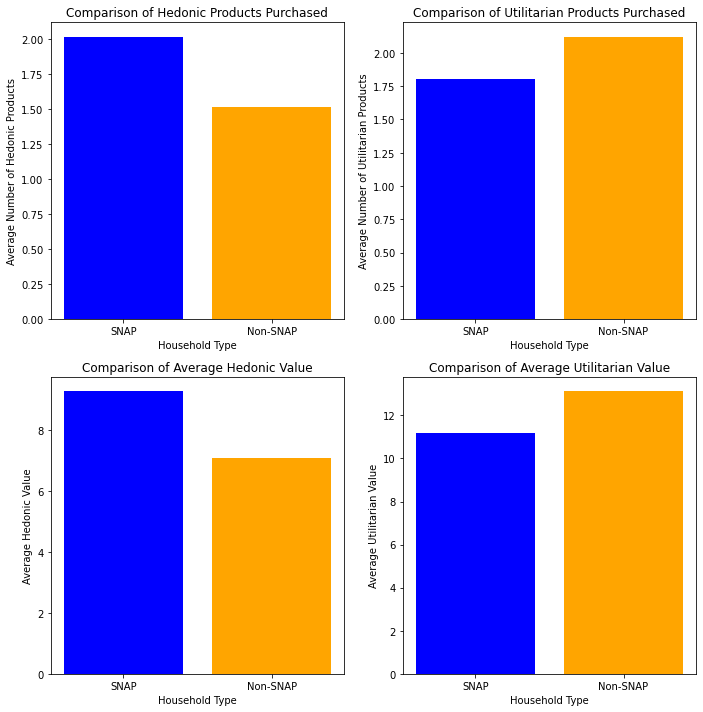

In [164]:
# Calculate the average number of hedonic and utilitarian products for SNAP and non-SNAP households
avg_hedonic_snap = snap_data['Number_HedonicProducts'].mean()
avg_hedonic_non_snap = non_snap_data['Number_HedonicProducts'].mean()

avg_utilitarian_snap = snap_data['Number_UtilitarianProducts'].mean()
avg_utilitarian_non_snap = non_snap_data['Number_UtilitarianProducts'].mean()

print("avg_hedonic_snap: ", avg_hedonic_snap)
print("avg_hedonic_non_snap: ", avg_hedonic_non_snap)
print("avg_utilitarian_snap: ", avg_utilitarian_snap)
print("avg_utilitarian_non_snap: ", avg_utilitarian_non_snap)

# Calculate the average hedonic and utilitarian values for SNAP and non-SNAP households
avg_hedonic_value_snap = snap_data['Hedonic_Value'].mean()
avg_hedonic_value_non_snap = non_snap_data['Hedonic_Value'].mean()

avg_utilitarian_value_snap = snap_data['Utilitarian_Value'].mean()
avg_utilitarian_value_non_snap = non_snap_data['Utilitarian_Value'].mean()

print("avg_hedonic_value_snap: ", avg_hedonic_value_snap)
print("avg_hedonic_value_non_snap: ", avg_hedonic_value_non_snap)
print("avg_utilitarian_value_snap: ", avg_utilitarian_value_snap)
print("avg_utilitarian_value_non_snap: ", avg_utilitarian_value_non_snap)

# Create a dictionary with the average values
data = {
    "Category": ["Average Hedonic Products (SNAP)", "Average Hedonic Products (Non-SNAP)",
                 "Average Utilitarian Products (SNAP)", "Average Utilitarian Products (Non-SNAP)",
                 "Average Hedonic Value (SNAP)", "Average Hedonic Value (Non-SNAP)",
                 "Average Utilitarian Value (SNAP)", "Average Utilitarian Value (Non-SNAP)"],
    "Average Value": [avg_hedonic_snap, avg_hedonic_non_snap, avg_utilitarian_snap, avg_utilitarian_non_snap,
                      avg_hedonic_value_snap, avg_hedonic_value_non_snap, avg_utilitarian_value_snap,
                      avg_utilitarian_value_non_snap]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the average number of hedonic products
axs[0, 0].bar(['SNAP', 'Non-SNAP'], [avg_hedonic_snap, avg_hedonic_non_snap], color=['blue', 'orange'])
axs[0, 0].set_xlabel('Household Type')
axs[0, 0].set_ylabel('Average Number of Hedonic Products')
axs[0, 0].set_title('Comparison of Hedonic Products Purchased')

# Plot the average number of utilitarian products
axs[0, 1].bar(['SNAP', 'Non-SNAP'], [avg_utilitarian_snap, avg_utilitarian_non_snap], color=['blue', 'orange'])
axs[0, 1].set_xlabel('Household Type')
axs[0, 1].set_ylabel('Average Number of Utilitarian Products')
axs[0, 1].set_title('Comparison of Utilitarian Products Purchased')

# Plot the average hedonic values
axs[1, 0].bar(['SNAP', 'Non-SNAP'], [avg_hedonic_value_snap, avg_hedonic_value_non_snap], color=['blue', 'orange'])
axs[1, 0].set_xlabel('Household Type')
axs[1, 0].set_ylabel('Average Hedonic Value')
axs[1, 0].set_title('Comparison of Average Hedonic Value')

# Plot the average utilitarian values
axs[1, 1].bar(['SNAP', 'Non-SNAP'], [avg_utilitarian_value_snap, avg_utilitarian_value_non_snap], color=['blue', 'orange'])
axs[1, 1].set_xlabel('Household Type')
axs[1, 1].set_ylabel('Average Utilitarian Value')
axs[1, 1].set_title('Comparison of Average Utilitarian Value')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

## Interpretation of Results

### Number of Hedonic Products:
* The t-statistic value of 4.922089850084236 suggests that there is a significant difference in the average number of hedonic products purchased between SNAP and non-SNAP households.
* The positive t-statistic indicates that, on average, SNAP households tend to purchase a higher number of hedonic products compared to non-SNAP households.
* The p-value is 1.0009968767798903e-06, which is smaller than the conventional significance level of 0.05. This indicates strong evidence to reject the null hypothesis that there is no difference in the number of hedonic products purchased by SNAP and non-SNAP households.

### Number of Utilitarian Products:

* The t-statistic value of -3.6058224820172438 suggests that there is a significant difference in the average number of utilitarian products purchased between SNAP and non-SNAP households.
* The negative t-statistic indicates that, on average, SNAP households tend to purchase a lower number of utilitarian products compared to non-SNAP households.
* The p-value is 0.0003265336401862399 (less than 0.05), indicating strong evidence to reject the null hypothesis that there is no difference in the number of utilitarian products purchased by SNAP and non-SNAP households.

### Value of Hedonic Products:
* Regarding the value of hedonic products, there is a statistically significant difference between SNAP and non-SNAP households. * The t-statistic of 4.38 indicates that SNAP households have a higher average value of hedonic products compared to non-SNAP households. 
* The p-value of 1.32e-05 provides strong evidence against the null hypothesis.

### Value of Utilitarian Products:
* Similarly, the analysis reveals a statistically significant difference in the value of utilitarian products purchased between SNAP and non-SNAP households.
* The t-statistic of -3.55 suggests that SNAP households have a lower average value of utilitarian products compared to non-SNAP households. 
* The p-value of 0.00041 supports this finding.

### Visualization
* The comparison of Hedonic Products Purchased by Household Type shows that SNAP households purchase on average 2.02 hedonic products compared to Non-Snap households at 1.52 hedonic products.
* The comparison of Utilitarian Products Purchased by Household Type shows that SNAP households on average purchase 1.8 utilitarian products compared to Non-Snap households at 2.12 utilitarian products.
* Furthermore, when considering the average values of hedonic value and utilitarian value, it can be observed that SNAP households have an average hedonic value of 9.27 and an average utilitarian value of 11.19. 
* On the other hand, non-SNAP households have an average hedonic value of 7.08 and an average utilitarian value of 13.12. These values indicate the perceived value or satisfaction derived from consuming hedonic and utilitarian products. Non-SNAP households tend to assign higher values to both hedonic and utilitarian products compared to SNAP households.

In summary, the results indicate that SNAP and non-SNAP households differ in terms of both the number and value of the food products they purchase. SNAP households tend to purchase a higher number of hedonic products but a lower number of utilitarian products compared to non-SNAP households. Additionally, SNAP households have a higher average value of both hedonic and utilitarian products compared to non-SNAP households. These findings provide insights into the divergent preferences and purchasing patterns of SNAP and non-SNAP households when it comes to food choices.

# Q2 It is often argued that SNAP households’ food consumption habits can be attributed to their lower income and/or education. Based on these data, does income and education explain the consumption pattern of SNAP households?

## Perform OLS regression

In [143]:
# Prepare the independent variables (income and education)
independent_vars = ['Income', 'Education']

# Prepare the dependent variables (consumption patterns)
dependent_vars = ['Number_HedonicProducts', 'Hedonic_Value']

# Subset the data for SNAP households
snap_data_subset = snap_data[independent_vars + dependent_vars].dropna()

# Add a constant term to the independent variables
independent_vars_with_const = sm.add_constant(snap_data_subset[independent_vars])

# Perform multiple linear regression for each dependent variable
for var in dependent_vars:
    model = sm.OLS(snap_data_subset[var], independent_vars_with_const)
    results = model.fit()

    print(f"Dependent Variable: {var}")
    print(results.summary().tables[0])
    print(results.summary())
    print()

Dependent Variable: Number_HedonicProducts
                              OLS Regression Results                              
Dep. Variable:     Number_HedonicProducts   R-squared:                       0.013
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.027
Date:                    Sat, 08 Jul 2023   Prob (F-statistic):              0.361
Time:                            20:00:09   Log-Likelihood:                -236.89
No. Observations:                     156   AIC:                             479.8
Df Residuals:                         153   BIC:                             488.9
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              OLS Regression Results                              
Dep. Variable:     Number_HedonicProducts   

## Interpretation of Results

Based on the statistical analysis results, the p-values for both income and education exceed the conventional significance level of 0.05 for all dependent variables. **Therefore, income and education are not statistically significant predictors of the consumption patterns of SNAP households, and we fail to reject the null hypothesis.** In other words, the results suggest that there is no statistically significant relationship between education or income and the consumption patterns of SNAP households. It is important to note that any observed associations between education or income and the dependent variables could be due to chance or random variation.

* Specifically, for the dependent variable "Number_HedonicProducts", neither income (p-value = 0.321) nor education (p-value = 0.209) demonstrate a significant relationship. 

* Similarly, for "Number_UtilitarianProducts", both income (p-value = 0.307) and education (p-value = 0.336) do not have a statistically significant impact on the consumption pattern. 

* The same lack of significance holds true for "Hedonic_Value" (income p-value = 0.233, education p-value = 0.183) and "Utilitarian_Value" (income p-value = 0.292, education p-value = 0.455).

* In this case, since the obtained p-values for the F-statistics are 0.361 and 0.284, which are both greater than the commonly used significance level of 0.05, we do not have sufficient evidence to conclude that income and education, as combined independent variables, significantly explain the consumption pattern of SNAP households.

Consequently, based on these findings, we cannot conclude that the consumption patterns of SNAP households can be solely explained by income and education. It is likely that other unexplored factors or variables play a more influential role in determining the consumption patterns of SNAP households. Further investigation is needed to identify these additional factors and understand their impact.

# Q3 It is often argued that SNAP households purchase more hedonic food because they consider it better value for money compared to utilitarian food. Based on these data, do SNAP households consider hedonic food to be better value for money than utilitarian food?

Average P-value rating for Hedonic Products: 2.9294871794871793
Average P-value rating for Utilitarian Products: 2.996794871794872
t-statistic: -0.6005569298339003
p-value: 0.5485739325313339


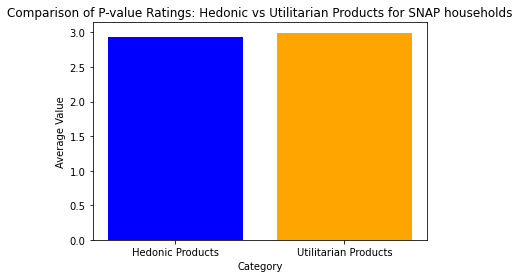

In [118]:
# Calculate the average ratings for hedonic and utilitarian products
avg_pvalue_hedonic = snap_data['Pvalue_Hedonic'].mean()
avg_pvalue_utilitarian = snap_data['Pvalue_Utilitarian'].mean()

# Perform a t-test to compare the ratings
t_statistic, p_value = stats.ttest_ind(snap_data['Pvalue_Hedonic'], 
                                       snap_data['Pvalue_Utilitarian'], equal_var=True)

# Print the results
print("Average P-value rating for Hedonic Products:", avg_pvalue_hedonic)
print("Average P-value rating for Utilitarian Products:", avg_pvalue_utilitarian)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Calculate the average P-value ratings for hedonic and utilitarian products
avg_pvalue_hedonic = snap_data['Pvalue_Hedonic'].mean()
avg_pvalue_utilitarian = snap_data['Pvalue_Utilitarian'].mean()

# Create a dictionary with the average values
data = {
    "Category": ["Hedonic Products", "Utilitarian Products"],
    "Average Value": [avg_pvalue_hedonic, avg_pvalue_utilitarian]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Create a bar plot
plt.bar(df['Category'], df['Average Value'], color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.title('Comparison of P-value Ratings: Hedonic vs Utilitarian Products for SNAP households')

# Display the plot
plt.show()

# Prepare the independent variables
independent_vars = ['Household_size', 'Age', 'Female', 'Pvalue_Hedonic', 'Pvalue_Utilitarian',
                    'Crave_Utilitarianproducts', 'Crave_Hedonicproducts', 'Unhealthy_Utilitarianproducts',
                    'Unhealthy_Hedonicproducts']

# Prepare the dependent variable
dependent_var = 'Hedonic_Value'

# Subset the data for SNAP households
snap_data_subset = snap_data[independent_vars + [dependent_var]].dropna()

# Add a constant term to the independent variables
independent_vars_with_const = sm.add_constant(snap_data_subset[independent_vars])

# Perform multiple linear regression
model = sm.OLS(snap_data_subset[dependent_var], independent_vars_with_const)
results = model.fit()

# Print the regression results
print("Multiple Linear Regression Results:")
print(results.summary())

In [152]:
# Prepare the independent variables
independent_vars = ['Household_size', 'Age', 'Female', 'Pvalue_Hedonic', 'Pvalue_Utilitarian',
                    'Crave_Utilitarianproducts', 'Crave_Hedonicproducts', 'Unhealthy_Utilitarianproducts',
                    'Unhealthy_Hedonicproducts']

# Prepare the dependent variable
dependent_var = 'Hedonic_Value'

# Subset the data for SNAP households
snap_data_subset = snap_data[independent_vars + [dependent_var]].dropna()

# Add a constant term to the independent variables
independent_vars_with_const = sm.add_constant(snap_data_subset[independent_vars])

# Perform multiple linear regression
model = sm.OLS(snap_data_subset[dependent_var], independent_vars_with_const)
results = model.fit()

# Print the regression results
print("Multiple Linear Regression Results:")
print(results.summary().tables[0])
print(results.summary().tables[1])

Multiple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:          Hedonic_Value   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     3.822
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           0.000232
Time:                        20:19:04   Log-Likelihood:                -469.41
No. Observations:                 156   AIC:                             958.8
Df Residuals:                     146   BIC:                             989.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

## Interpretation of Results
Based on the analysis of the data, including the results of the t-test and OLS regression, it can be concluded that no, SNAP households do not consider hedonic food to be better value for money compared to utilitarian food.

**T-Test Results:**
* The average P-value rating for Hedonic Products is 2.929, while the average P-value rating for Utilitarian Products is 2.997. The t-statistic is -0.601 with a p-value of 0.549. A low p-value in the t-test indicates that there is no significant difference in the perceived value for money between hedonic and utilitarian products for SNAP households. In other words, the difference in the average P-value ratings is likely due to random chance, rather than a meaningful difference in value perception.


**OLS Regression Results:**
* The F-statistic is 3.822 with a p-value of 0.000232. This suggests that the overall regression model is statistically significant, indicating that the independent variables collectively have an impact on the dependent variable (Hedonic_Value). However, when examining the individual independent variables, we find that none of them have statistically significant coefficients (p-values > 0.05). This means that the independent variables, including variables related to perceived value (Pvalue_Hedonic and Pvalue_Utilitarian), do not have a significant impact on the dependent variable. Therefore, we cannot conclude that SNAP households consider hedonic food to be better value for money than utilitarian food based on the results of the regression analysis.

# Q4 Do SNAP households’ unhealthiness perceptions of the food differ from non-SNAP households?

Average Unhealthiness Rating (SNAP - Hedonic): 4.086538461538462
Average Unhealthiness Rating (Non-SNAP - Hedonic): 4.671099290780142
t-statistic (Hedonic): -9.097931312831586
p-value (Hedonic): 4.8583698337186665e-19
--------------------------
Average Unhealthiness Rating (SNAP - Utilitarian): 1.6137820512820513
Average Unhealthiness Rating (Non-SNAP - Utilitarian): 1.4979314420803782
t-statistic (Utilitarian): 2.6063694353218607
p-value (Utilitarian): 0.009286869923269995


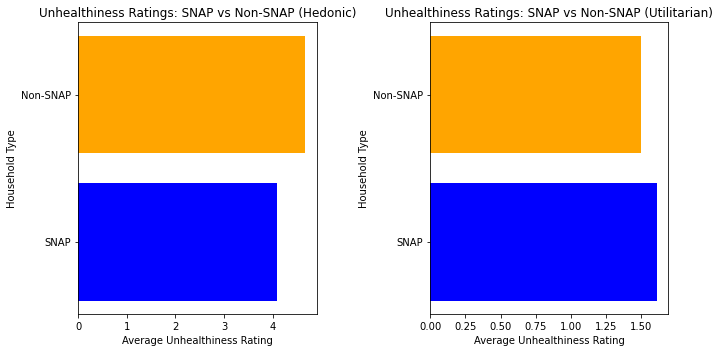

In [162]:
# Calculate the average unhealthiness ratings for SNAP and non-SNAP households for Hedonic products
avg_unhealthiness_snap_hedonic = snap_data['Unhealthy_Hedonicproducts'].mean()
avg_unhealthiness_non_snap_hedonic = non_snap_data['Unhealthy_Hedonicproducts'].mean()

# Calculate the average unhealthiness ratings for SNAP and non-SNAP households for Utilitarian products
avg_unhealthiness_snap_util = snap_data['Unhealthy_Utilitarianproducts'].mean()
avg_unhealthiness_non_snap_util = non_snap_data['Unhealthy_Utilitarianproducts'].mean()

# Perform a t-test to compare the ratings for Hedonic products
t_statistic_hedonic, p_value_hedonic = stats.ttest_ind(snap_data['Unhealthy_Hedonicproducts'], 
                                                      non_snap_data['Unhealthy_Hedonicproducts'], equal_var=True)
# Perform a t-test to compare the ratings for Utilitarian products
t_statistic_util, p_value_util = stats.ttest_ind(snap_data['Unhealthy_Utilitarianproducts'], 
                                                non_snap_data['Unhealthy_Utilitarianproducts'], equal_var=True)

# Print the results for Hedonic products
print("Average Unhealthiness Rating (SNAP - Hedonic):", avg_unhealthiness_snap_hedonic)
print("Average Unhealthiness Rating (Non-SNAP - Hedonic):", avg_unhealthiness_non_snap_hedonic)
print("t-statistic (Hedonic):", t_statistic_hedonic)
print("p-value (Hedonic):", p_value_hedonic)
print("--------------------------")

# Print the results for Utilitarian products
print("Average Unhealthiness Rating (SNAP - Utilitarian):", avg_unhealthiness_snap_util)
print("Average Unhealthiness Rating (Non-SNAP - Utilitarian):", avg_unhealthiness_non_snap_util)
print("t-statistic (Utilitarian):", t_statistic_util)
print("p-value (Utilitarian):", p_value_util)

# Create the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the average unhealthiness ratings for Hedonic products
axs[0].barh(['SNAP', 'Non-SNAP'], [avg_unhealthiness_snap_hedonic, avg_unhealthiness_non_snap_hedonic], color=['blue', 'orange'])
axs[0].set_ylabel('Household Type')
axs[0].set_xlabel('Average Unhealthiness Rating')
axs[0].set_title('Unhealthiness Ratings: SNAP vs Non-SNAP (Hedonic)')

# Plot the average unhealthiness ratings for Utilitarian products
axs[1].barh(['SNAP', 'Non-SNAP'], [avg_unhealthiness_snap_util, avg_unhealthiness_non_snap_util], color=['blue', 'orange'])
axs[1].set_ylabel('Household Type')
axs[1].set_xlabel('Average Unhealthiness Rating')
axs[1].set_title('Unhealthiness Ratings: SNAP vs Non-SNAP (Utilitarian)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


## Interpretation of Results

Based on the results, it is evident that SNAP households' unhealthiness perceptions of food differ from non-SNAP households.

**For Hedonic products:**
* The average unhealthiness rating for SNAP households is 4.087, whereas for non-SNAP households it is 4.671. This suggests that non-SNAP households perceive Hedonic products to be slightly more unhealthy compared to SNAP households.
* The t-statistic is -9.098 with a remarkably low p-value of 4.858e-19. This indicates a statistically significant difference in unhealthiness perceptions between the two groups.

**For Utilitarian products:**
* The average unhealthiness rating for SNAP households is 1.614, while for non-SNAP households it is 1.498. This implies that non-SNAP households perceive Utilitarian products to be slightly more unhealthy than SNAP households do.
* The t-statistic is 2.606 with a p-value of 0.0093. This suggests a statistically significant difference in unhealthiness perceptions between the two groups.
* The results of the t-tests confirm that there is a significant disparity in unhealthiness perceptions between SNAP and non-SNAP households for both Hedonic and Utilitarian products. SNAP households tend to perceive Hedonic products as less unhealthy, while non-SNAP households perceive them as more unhealthy. Similarly, SNAP households perceive Utilitarian products as slightly less unhealthy compared to non-SNAP households.

These findings support the notion that SNAP households' unhealthiness perceptions of food differ from those of non-SNAP households. The disparities may arise from variations in factors such as socioeconomic status, dietary preferences, or cultural influences.

# Q5 Do SNAP households’ reports of food craving differ from non-SNAP households?

Average Craving Rating for Hedonic Products (SNAP): 3.030448717948718
Average Craving Rating for Hedonic Products (Non-SNAP): 2.6217494089834514
t-statistic (Hedonic): 4.551769666294766
p-value (Hedonic): 5.973531475415773e-06
--------------------------
Average Craving Rating for Utilitarian Products (SNAP): 2.581730769230769
Average Craving Rating for Utilitarian Products (Non-SNAP): 2.154255319148936
t-statistic (Utilitarian): 5.095436465996287
p-value (Utilitarian): 4.1584642068173737e-07


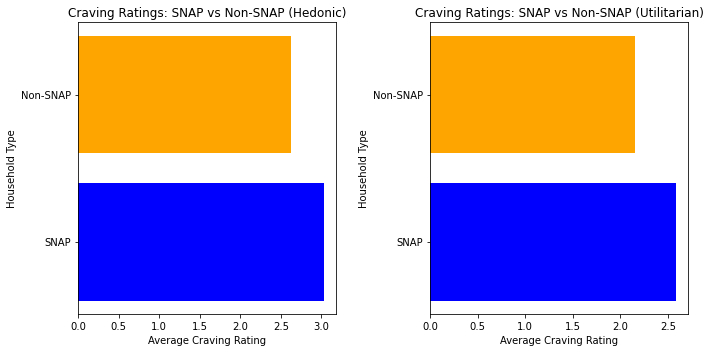

In [163]:
# Calculate the average craving ratings for SNAP and non-SNAP households for Hedonic products
avg_craving_snap = snap_data['Crave_Hedonicproducts'].mean()
avg_craving_non_snap = non_snap_data['Crave_Hedonicproducts'].mean()

# Perform a t-test to compare the ratings for Hedonic products
t_statistic_hedonic, p_value_hedonic = stats.ttest_ind(snap_data['Crave_Hedonicproducts'], 
                                                      non_snap_data['Crave_Hedonicproducts'], equal_var=True)

# Calculate the average craving ratings for SNAP and non-SNAP households for Utilitarian products
avg_craving_snap_util = snap_data['Crave_Utilitarianproducts'].mean()
avg_craving_non_snap_util = non_snap_data['Crave_Utilitarianproducts'].mean()

# Perform a t-test to compare the ratings for Utilitarian products
t_statistic_util, p_value_util = stats.ttest_ind(snap_data['Crave_Utilitarianproducts'], 
                                                non_snap_data['Crave_Utilitarianproducts'], equal_var=True)

# Print the results for Hedonic products
print("Average Craving Rating for Hedonic Products (SNAP):", avg_craving_snap)
print("Average Craving Rating for Hedonic Products (Non-SNAP):", avg_craving_non_snap)
print("t-statistic (Hedonic):", t_statistic_hedonic)
print("p-value (Hedonic):", p_value_hedonic)
print("--------------------------")

# Print the results for Utilitarian products
print("Average Craving Rating for Utilitarian Products (SNAP):", avg_craving_snap_util)
print("Average Craving Rating for Utilitarian Products (Non-SNAP):", avg_craving_non_snap_util)
print("t-statistic (Utilitarian):", t_statistic_util)
print("p-value (Utilitarian):", p_value_util)

# Create the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the average craving ratings for Hedonic products
axs[0].barh(['SNAP', 'Non-SNAP'], [avg_craving_snap, avg_craving_non_snap], color=['blue', 'orange'])
axs[0].set_ylabel('Household Type')
axs[0].set_xlabel('Average Craving Rating')
axs[0].set_title('Craving Ratings: SNAP vs Non-SNAP (Hedonic)')

# Plot the average craving ratings for Utilitarian products
axs[1].barh(['SNAP', 'Non-SNAP'], [avg_craving_snap_util, avg_craving_non_snap_util], color=['blue', 'orange'])
axs[1].set_ylabel('Household Type')
axs[1].set_xlabel('Average Craving Rating')
axs[1].set_title('Craving Ratings: SNAP vs Non-SNAP (Utilitarian)')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

## Interpretation of Results
Based on the results of the t-test analysis and the comparison of craving ratings between SNAP and non-SNAP households, it can be concluded that SNAP households' reports of food craving differ from non-SNAP households.

**For Hedonic Products:**
* SNAP households reported an average craving rating of 3.030, while non-SNAP households reported an average rating of 2.622.
* The t-statistic for the comparison of craving ratings between SNAP and non-SNAP households was 4.552, with a p-value of 5.974e-06. 
* These results indicate a statistically significant difference in craving ratings for Hedonic Products between the two groups. SNAP households, on average, reported higher craving levels for Hedonic Products compared to non-SNAP households.

**For Utilitarian Products:**
* SNAP households reported an average craving rating of 2.582, while non-SNAP households reported an average rating of 2.154.
* The t-statistic for the comparison of craving ratings between SNAP and non-SNAP households was 5.095, with a p-value of 4.158e-07. 
* Similar to Hedonic Products, there is a statistically significant difference in craving ratings for Utilitarian Products between SNAP and non-SNAP households. SNAP households, on average, reported higher craving levels for Utilitarian Products compared to non-SNAP households.

These findings suggest that SNAP households experience stronger cravings for both Hedonic and Utilitarian food items compared to non-SNAP households. The results indicate that food craving is influenced by household type, with SNAP households exhibiting higher levels of craving across both food categories.

# Q6 This question pertains only to hedonic food, you can ignore utilitarian food. How is craving for hedonic food related to perceptions of its unhealthiness? Does the relationship between craving and unhealthiness perception vary for SNAP and non-SNAP households?

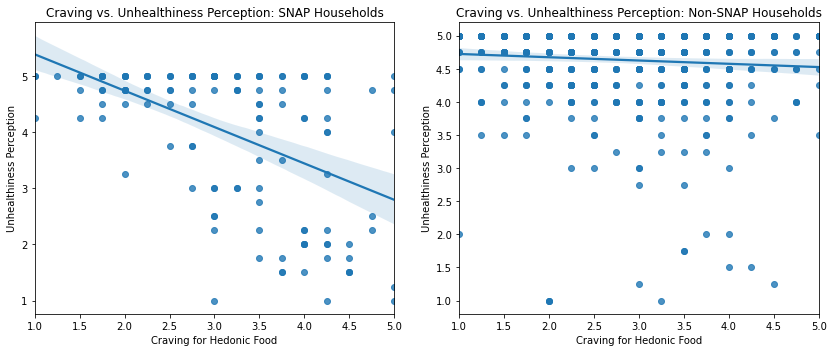

Correlation (SNAP): -0.507515608940843
Correlation (Non-SNAP): -0.07704964961487347


In [178]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot with regression line for SNAP households
sns.regplot(x='Crave_Hedonicproducts', y='Unhealthy_Hedonicproducts', data=snap_hedonic_data, ax=axs[0])
axs[0].set_title('Craving vs. Unhealthiness Perception: SNAP Households')
axs[0].set_xlabel('Craving for Hedonic Food')
axs[0].set_ylabel('Unhealthiness Perception')

# Scatter plot with regression line for non-SNAP households
sns.regplot(x='Crave_Hedonicproducts', y='Unhealthy_Hedonicproducts', data=non_snap_hedonic_data, ax=axs[1])
axs[1].set_title('Craving vs. Unhealthiness Perception: Non-SNAP Households')
axs[1].set_xlabel('Craving for Hedonic Food')
axs[1].set_ylabel('Unhealthiness Perception')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Print the correlation coefficients
print("Correlation (SNAP):", snap_corr)
print("Correlation (Non-SNAP):", non_snap_corr)

In [171]:
# Prepare the data subset for the regression analysis
regression_data = snap_data[['Unhealthy_Hedonicproducts', 'Crave_Hedonicproducts']].dropna()

# Add a constant term to the independent variables
regression_data = sm.add_constant(regression_data)

# Perform OLS regression
model = sm.OLS(regression_data['Unhealthy_Hedonicproducts'], regression_data[['const', 'Crave_Hedonicproducts']])
results = model.fit()

# Print the regression results
print("Regression Results for SNAP Households:")
print(results.summary().tables[0])
print(results.summary().tables[1])

# Prepare the data subset for the regression analysis
non_snap_regression_data = non_snap_data[['Unhealthy_Hedonicproducts', 'Crave_Hedonicproducts']].dropna()

# Add a constant term to the independent variables
non_snap_regression_data = sm.add_constant(non_snap_regression_data)

# Perform OLS regression for non-SNAP households
model = sm.OLS(non_snap_regression_data['Unhealthy_Hedonicproducts'], non_snap_regression_data[['const', 'Crave_Hedonicproducts']])
results = model.fit()

# Print the regression results for non-SNAP households
print("Regression Results for Non-SNAP Households:")
print(results.summary().tables[0])
print(results.summary().tables[1])

Regression Results for SNAP Households:
                                OLS Regression Results                               
Dep. Variable:     Unhealthy_Hedonicproducts   R-squared:                       0.255
Model:                                   OLS   Adj. R-squared:                  0.250
Method:                        Least Squares   F-statistic:                     52.61
Date:                       Sat, 08 Jul 2023   Prob (F-statistic):           1.86e-11
Time:                               23:32:10   Log-Likelihood:                -230.09
No. Observations:                        156   AIC:                             464.2
Df Residuals:                            154   BIC:                             470.3
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------

## Interpretation of Results
The results reveal that there is a correlation between craving and unhealthiness perception. Furthermore, the relationship between craving and unhealthiness perception varies for SNAP and non-SNAP households.

**Based on the results:**
* Correlation: For SNAP households, there is a moderate negative correlation (-0.508) between craving for hedonic food and perceptions of its unhealthiness. This indicates that as craving increases, the perception of unhealthiness decreases. However, for non-SNAP households, there is a weak negative correlation (-0.077) between craving and unhealthiness perception.

* Regression Analysis - SNAP Households: The regression analysis shows that craving for hedonic food is a statistically significant predictor of unhealthiness perception for SNAP households (p < 0.001). The R-squared value of 0.255 indicates that craving explains about 25.5% of the variation in unhealthiness perception among SNAP households.

* Regression Analysis - Non-SNAP Households: The regression analysis for non-SNAP households also shows that craving for hedonic food is a statistically significant predictor of unhealthiness perception (p < 0.001). However, the R-squared value is much lower (0.015), indicating that craving explains only 1.5% of the variation in unhealthiness perception among non-SNAP households.

In summary, there is a stronger negative relationship between craving for hedonic food and perceptions of its unhealthiness among SNAP households compared to non-SNAP households. Craving is a more significant predictor of unhealthiness perception for SNAP households.